Figure 1: κ=1e-16, m=2
color 'red' = μ=1
Salvo main figure como fig_k0_m2_red-mu1.png


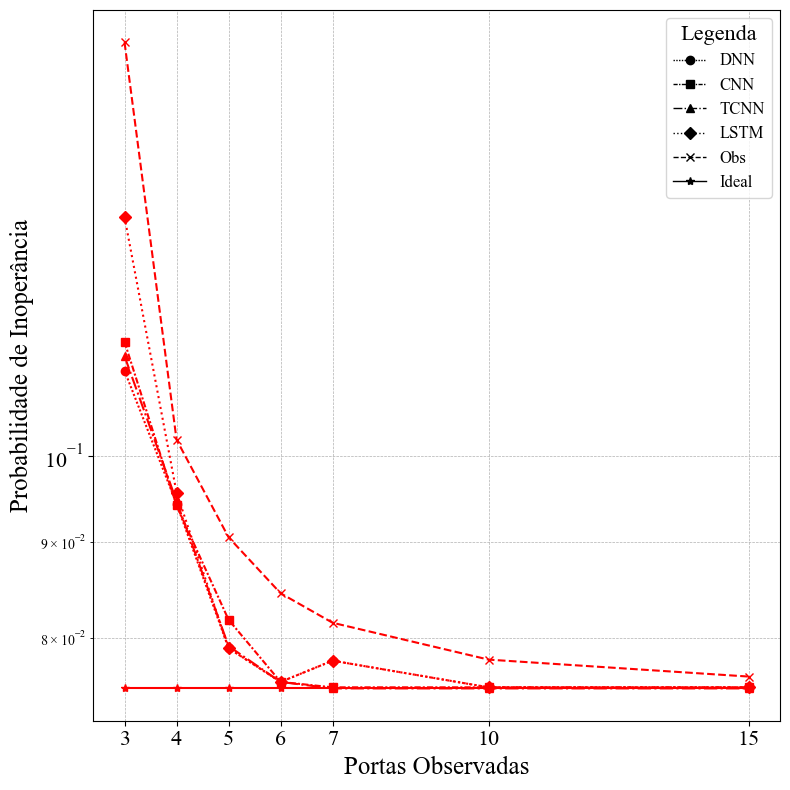

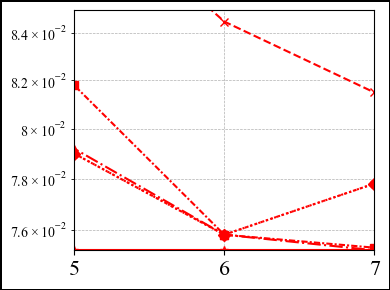

Figure 2: κ=1e-16, m=50.0
color 'red' = μ=1
color 'darkblue' = μ=2
color 'darkgreen' = μ=5
Salvo main figure como fig_k0_m50.0_red-mu1_darkblue-mu2_darkgreen-mu5.png


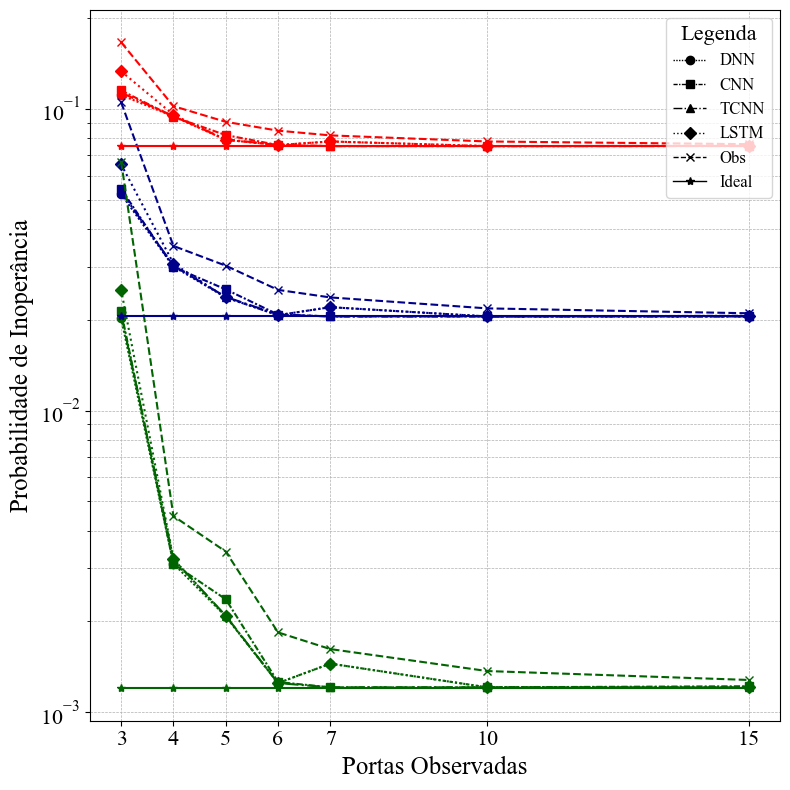

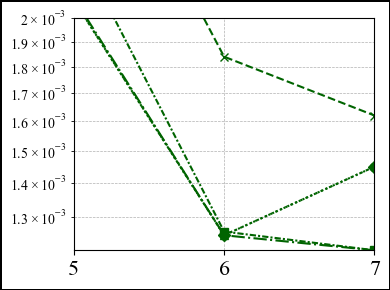

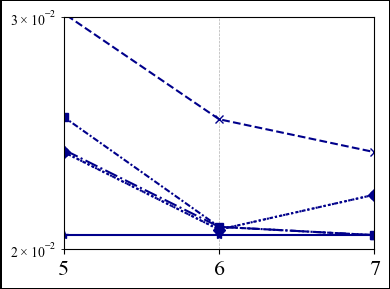

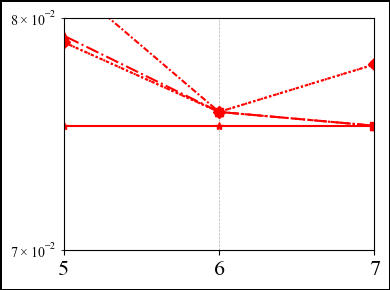

Figure 3: κ=5, m=2
color 'red' = μ=1
color 'darkblue' = μ=2
color 'darkgreen' = μ=5
Salvo main figure como fig_k5_m2_red-mu1_darkblue-mu2_darkgreen-mu5.png


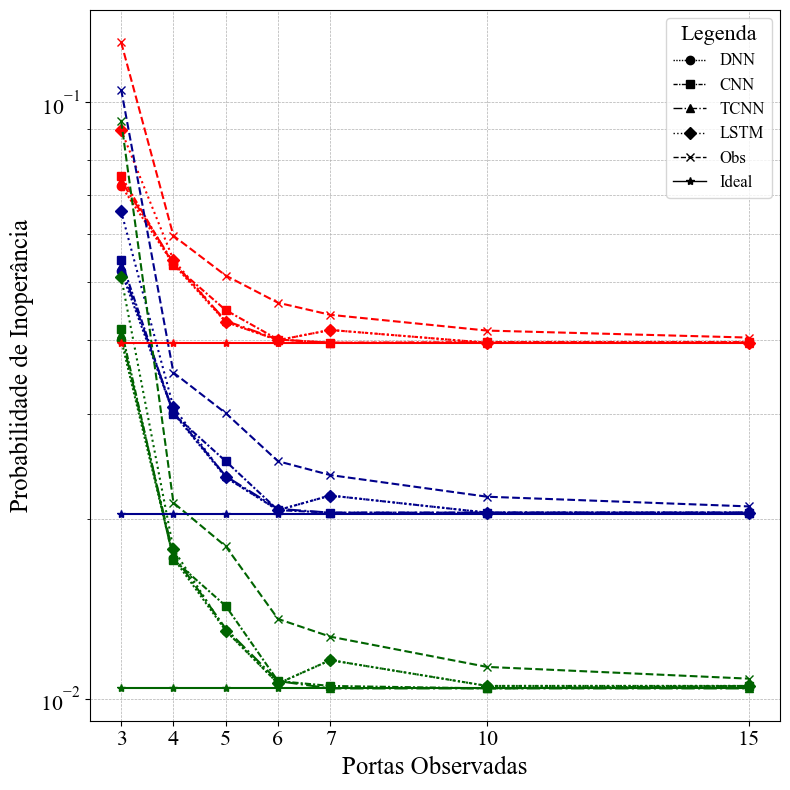

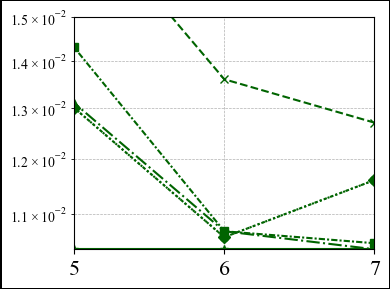

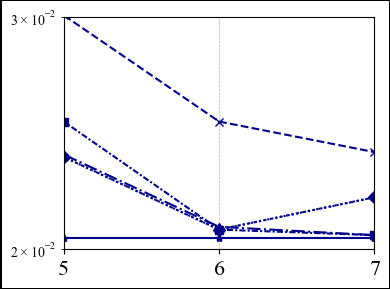

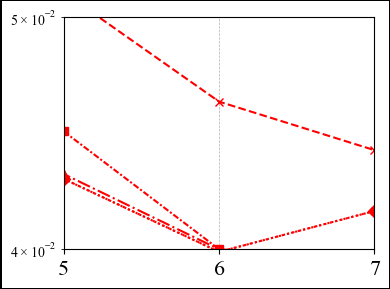

Figure 4: κ=5, m=50.0
color 'red' = μ=1
color 'darkblue' = μ=2
color 'darkgreen' = μ=5
Salvo main figure como fig_k5_m50.0_red-mu1_darkblue-mu2_darkgreen-mu5.png


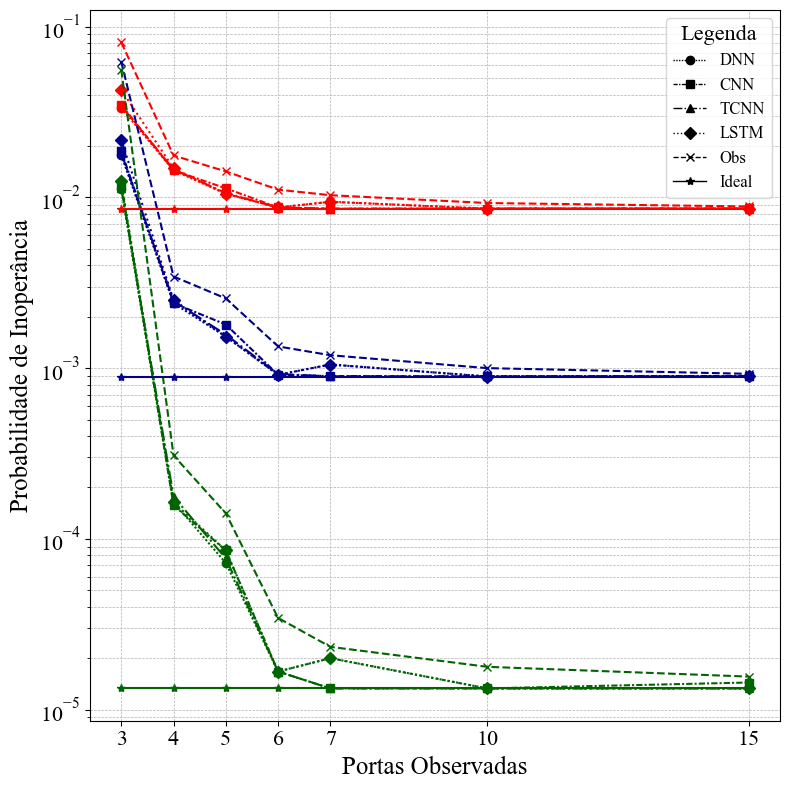

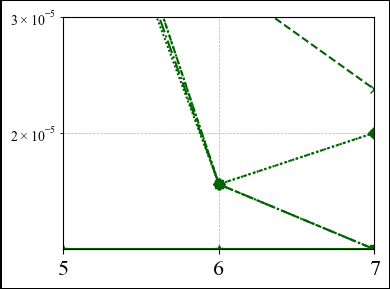

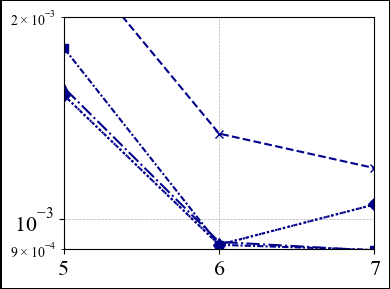

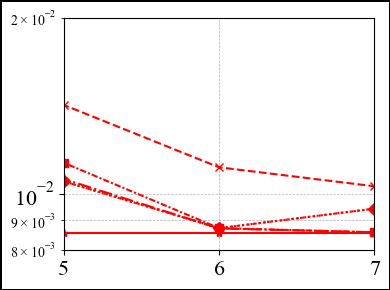

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl

# ─ Use Times New Roman for all text ───────────────────────────────
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times New Roman"]

# --- FONT SIZE SETTINGS (edit here) ---
axis_label_fs = 18  # axis labels
tick_label_fs = 16  # main ticks
legend_fs = 12  # legend entries
legend_title_fs = 16  # legend titles
FIGSIZE = (8, 8)
# ---------------------------------------

# 1. Load & filter
paths = {
    "DNN": "./data/dnn.csv",
    "CNN": "./data/cnn.csv",
    "TCNN": "./data/tcnn.csv",
    "LSTM": "./data/lstm.csv",
    "Obs": "./data/obs.csv",
    "Ideal": "./data/ideal.csv",
}
dfs = {name: pd.read_csv(p) for name, p in paths.items()}
for df in dfs.values():
    df.drop(df[df["m"] == 0.001].index, inplace=True)

# 2. Determine κ and m targets
combo_df = (
    pd.concat([df[["kappa", "mu", "m"]] for df in dfs.values()]).drop_duplicates().reset_index(drop=True)
)
kappas = sorted(combo_df["kappa"].unique())
kappa0 = kappas[0]
kappa5 = 5
m_vals = [m for m in sorted(combo_df["m"].unique()) if m != 0.001]
m2, m_inf = 2, m_vals[-1]

# 3. Palette, linestyles & markers
palette_colors = ["red", "darkblue", "darkgreen", "purple"]
linestyles = {
    "DNN": (0, (1, 1)),
    "CNN": (0, (3, 1, 1, 1)),
    "TCNN": "-.",
    "LSTM": ":",
    "Obs": "--",
    "Ideal": "-",
}
marker_map = {
    "DNN": "o",
    "CNN": "s",
    "TCNN": "^",
    "LSTM": "D",
    "Obs": "x",
    "Ideal": "*",
}
x = [3, 4, 5, 6, 7, 10, 15]

# 4. Zoom configurations (for mini plots)
zoom_configs = {
    1: [{"xlim": (5, 7), "ylim": ("auto", 8.5e-2)}],
    2: [
        {"xlim": (5, 7), "ylim": ("auto", 2e-3)},
        {"xlim": (5, 7), "ylim": (2e-2, 3e-2)},
        {"xlim": (5, 7), "ylim": (7e-2, 8e-2)},
    ],
    3: [
        {"xlim": (5, 7), "ylim": ("auto", 1.5e-2)},
        {"xlim": (5, 7), "ylim": (2e-2, 3e-2)},
        {"xlim": (5, 7), "ylim": (4e-2, 5e-2)},
    ],
    4: [
        {"xlim": (5, 7), "ylim": ("auto", 3e-5)},
        {"xlim": (5, 7), "ylim": (9e-4, 2e-3)},
        {"xlim": (5, 7), "ylim": (8e-3, 2e-2)},
    ],
}


def plot_main_and_zooms(fig_num, kappa_target, m_val):
    print(f"Figure {fig_num}: κ={kappa_target}, m={m_val}")

    # prepare μ → color mapping
    cp = combo_df[(combo_df.kappa == kappa_target) & (combo_df.m == m_val)]
    mu_list = sorted(cp["mu"].unique())
    color_map = {mu: palette_colors[i % len(palette_colors)] for i, mu in enumerate(mu_list)}
    mapping_str = "_".join(f"{color_map[mu]}-mu{mu}" for mu in mu_list)

    # --- Main figure ---
    fig, ax = plt.subplots(figsize=FIGSIZE)
    for name, df in dfs.items():
        sub = df[(df.kappa == kappa_target) & (df.m == m_val)]
        for _, row in sub.iterrows():
            mu = row["mu"]
            col = color_map[mu]
            y = [row["OP"]] * len(x) if name == "Ideal" else row[[str(xx) for xx in x]].astype(float).values
            ax.plot(x, y, color=col, linestyle=linestyles[name], marker=marker_map[name], label=name)

    ax.set_xscale("linear")
    ax.set_yscale("log")
    ax.set_xlabel("Portas Observadas", fontsize=axis_label_fs)
    ax.set_ylabel("Probabilidade de Inoperância", fontsize=axis_label_fs)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.set_xticks(x)
    ax.tick_params(labelsize=tick_label_fs)

    # print color = μ mappings instead of legend
    for mu in mu_list:
        print(f"color '{color_map[mu]}' = μ={mu}")

    # Fonte legend (marker & linestyle), title "Legenda", upper right
    sources = [s for s in dfs if not dfs[s][(dfs[s].kappa == kappa_target) & (dfs[s].m == m_val)].empty]
    sh = [
        Line2D([0], [0], color="black", linestyle=linestyles[s], marker=marker_map[s], lw=1) for s in sources
    ]
    ax.legend(
        sh, sources, title="Legenda", loc="upper right", fontsize=legend_fs, title_fontsize=legend_title_fs
    )

    plt.tight_layout()

    # salva figura principal
    filename = f"fig_k{int(kappa_target)}_m{m_val}_{mapping_str}.png"
    fig.savefig(filename)
    print(f"Salvo main figure como {filename}")

    plt.show()

    # --- Zoom mini-plots ---
    for cfg in zoom_configs[fig_num]:
        x0, x1 = cfg["xlim"]
        y0, y1 = cfg["ylim"]
        if y0 == "auto":
            y_vals = []
            for df in dfs.values():
                sub = df[(df.kappa == kappa_target) & (df.m == m_val)]
                for _, row in sub.iterrows():
                    for xx in x:
                        if x0 <= xx <= x1 and str(xx) in row.index:
                            y_vals.append(float(row[str(xx)]))
            y0 = min(y_vals) if y_vals else None

        figz, axz = plt.subplots(figsize=(4, 3))

        # add a black border around the figure
        figz.patch.set_edgecolor('black')
        figz.patch.set_linewidth(2)   # adjust thickness as needed
        figz.patch.set_facecolor('white')  # ensure the interior stays white

        for name, df in dfs.items():
            sub = df[(df.kappa == kappa_target) & (df.m == m_val)]
            for _, row in sub.iterrows():
                mu = row["mu"]
                col = color_map[mu]
                y = (
                    [row["OP"]] * len(x)
                    if name == "Ideal"
                    else row[[str(xx) for xx in x]].astype(float).values
                )
                axz.plot(x, y, color=col, linestyle=linestyles[name], marker=marker_map[name])
        axz.set_xscale("linear")
        axz.set_yscale("log")
        axz.set_xlim(x0, x1)
        axz.set_ylim(y0, y1)
        axz.set_xticks(list(range(int(x0), int(x1) + 1)))
        axz.grid(True, which="both", linestyle="--", linewidth=0.5)
        axz.tick_params(labelsize=tick_label_fs)
        plt.tight_layout()
        plt.show()


# 5. Generate all four figures and their mini zooms
plot_main_and_zooms(1, kappa0, m2)
plot_main_and_zooms(2, kappa0, m_inf)
plot_main_and_zooms(3, kappa5, m2)
plot_main_and_zooms(4, kappa5, m_inf)